In [10]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import minmax_scale
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import keras.backend as K
import yfinance as yf

In [11]:
ticker_symbol = "TTD"
df =yf.download(ticker_symbol, start="2016-01-01", end="2023-01-01")
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-21,2.875,3.0400,2.780,3.010,3.010,63438000
2016-09-22,3.100,3.1700,2.841,2.890,2.890,22728000
2016-09-23,2.885,2.8900,2.684,2.766,2.766,10587000
2016-09-26,2.710,2.8420,2.700,2.777,2.777,3061000
2016-09-27,2.833,3.0848,2.734,2.998,2.998,10158000


In [12]:
print("Dataframe Shape:", df.shape)
# Checking for null values 
print("Null Value Present:", df.isnull().values.any())
df.describe()

Dataframe Shape: (1581, 6)
Null Value Present: False


,Open,High,Low,Close,Adj Close,Volume
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1.581000e+03
mean,34.314497,35.226360,33.386436,34.319718,34.319718,1.066480e+07
std,28.776685,29.524001,27.995209,28.759968,28.759968,9.923068e+06
min,2.215000,2.350000,2.200000,2.280000,2.280000,6.310000e+05
25%,6.410000,6.477000,6.281000,6.389000,6.389000,5.097000e+06
50%,24.284000,24.676500,23.771999,24.351999,24.351999,7.982000e+06
75%,60.250000,61.855000,58.509998,59.985001,59.985001,1.318780e+07
max,111.089996,114.089996,107.050003,111.639999,111.639999,1.276240e+08


<Axes: xlabel='Date'>

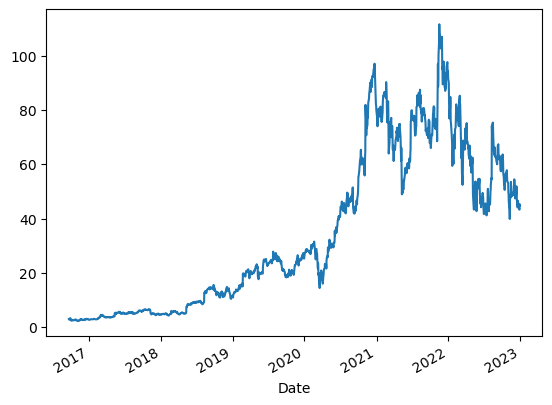

In [13]:
df['Adj Close'].plot()

In [14]:
# Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [18]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected features
feature_transform = scaler.fit_transform(df[features])

# DataFrame with transformed features
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
print(" Transformed features for TTD:")
feature_transform.head()


 Transformed features for TTD:


,Open,High,Low,Volume
Date,,,,
2016-09-21,0.006062,0.006175,0.005532,0.494571
2016-09-22,0.008129,0.007338,0.006113,0.174002
2016-09-23,0.006154,0.004833,0.004616,0.078398
2016-09-26,0.004546,0.004403,0.004769,0.019135
2016-09-27,0.005676,0.006576,0.005093,0.075020


In [19]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output_var.iloc[train_index].values.ravel(), output_var.iloc[test_index].values.ravel()


In [20]:
trainX = np.array(X_train)
testX = np.array(X_test)

# Reshape the features for RNN input (samples, time steps, features)
X_train = trainX.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = testX.reshape(X_test.shape[0], X_test.shape[1], 1)
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)


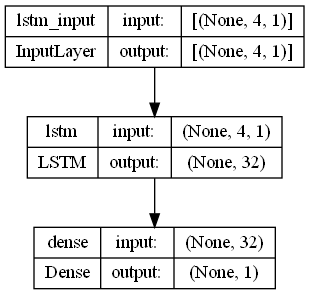

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils.vis_utils import plot_model

# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Plotting the model architecture
plot_model(lstm, show_shapes=True, show_layer_names=True)


In [22]:
history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)


Epoch 1/50
180/180 [==============================] - 3s 5ms/step - loss: 393.2934
Epoch 2/50
180/180 [==============================] - 1s 5ms/step - loss: 101.1182
Epoch 3/50
180/180 [==============================] - 1s 5ms/step - loss: 73.7205
Epoch 4/50
180/180 [==============================] - 1s 5ms/step - loss: 51.5246
Epoch 5/50
180/180 [==============================] - 1s 5ms/step - loss: 37.4819
Epoch 6/50
180/180 [==============================] - 1s 5ms/step - loss: 29.9871
Epoch 7/50
180/180 [==============================] - 1s 5ms/step - loss: 26.4044
Epoch 8/50
180/180 [==============================] - 1s 5ms/step - loss: 24.4992
Epoch 9/50
180/180 [==============================] - 1s 5ms/step - loss: 23.2211
Epoch 10/50
180/180 [==============================] - 1s 5ms/step - loss: 22.2578
Epoch 11/50
180/180 [==============================] - 1s 5ms/step - loss: 21.4946
Epoch 12/50
180/180 [==============================] - 1s 5ms/step - loss: 20.8988
Epoch 13/50

In [23]:
y_pred= lstm.predict(X_test)

5/5 [==============================] - 0s 3ms/step


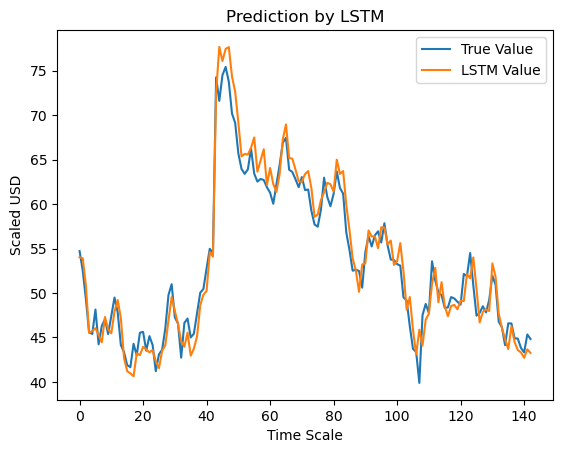

In [24]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
